In [1]:
import pandas as pd
import os
from mapboxgl.utils import *
from mapboxgl.viz import *
import plotly.express as px

### How to fix blank maps and graph in jupyter lab!!
Check out link here: https://stackoverflow.com/questions/54936125/plotly-gives-an-empty-field-as-output-in-jupyter-lab

In [2]:
# Load data from sample csv
data_url = 'https://raw.githubusercontent.com/mapbox/mapboxgl-jupyter/master/examples/data/points.csv'
df = pd.read_csv(data_url)

# Must be a public token, starting with `pk`
token = 'pk.eyJ1IjoiYW5uZWUiLCJhIjoiY2puYng1ZjNlMDU3djN2c2YxdGxqeTk5biJ9.Iq8vP18GcAukiVpWNqJ5Pg'

# Create a geojson Feature Collection export from a Pandas dataframe
points = df_to_geojson(df, 
                       properties=['Avg Medicare Payments', 'Avg Covered Charges', 'date'],
                       lat='lat', lon='lon', precision=3)

# Generate color stops from colorBrewer
measure_color = 'Avg Covered Charges'
color_breaks = [round(df[measure_color].quantile(q=x*0.1), 2) for x in range(2, 10)]
color_stops = create_color_stops(color_breaks, colors='BrBG')

# Generate radius breaks from data domain and circle-radius range
measure_radius = 'Avg Medicare Payments'
radius_breaks = [round(df[measure_radius].quantile(q=x*0.1), 2) for x in range(2,10)]
radius_stops = create_radius_stops(radius_breaks, 0.5, 10)

# Create the viz
viz = GraduatedCircleViz(points,
                         access_token=token,
                         color_property='Avg Covered Charges',
                         color_stops=color_stops,
                         radius_property='Avg Medicare Payments',
                         stroke_color='black',
                         stroke_width=0.5,
                         radius_stops=radius_stops,
                         center=(-95, 40),
                         zoom=3,
                         below_layer='waterway-label'
                        )

viz.show();

/anaconda3/envs/python37/lib/python3.7/site-packages/IPython/core/display.py:701: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


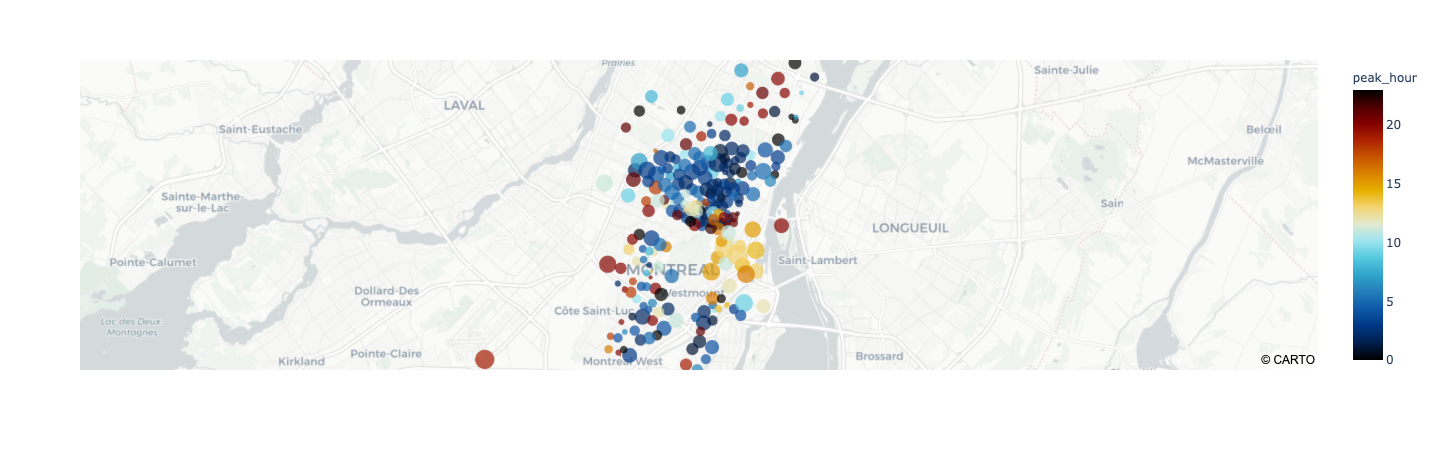

In [3]:
df_px = px.data.carshare()
fig = px.scatter_mapbox(df_px, lat="centroid_lat", lon="centroid_lon", color="peak_hour", size="car_hours",
                  color_continuous_scale=px.colors.cyclical.IceFire, size_max=15, zoom=10, mapbox_style="carto-positron")
fig.show()

In [4]:
df_px.head()

centroid_lat  centroid_lon    car_hours  peak_hour
0     45.471549    -73.588684  1772.750000          2
1     45.543865    -73.562456   986.333333         23
2     45.487640    -73.642767   354.750000         20
3     45.522870    -73.595677   560.166667         23
4     45.453971    -73.738946  2836.666667         19

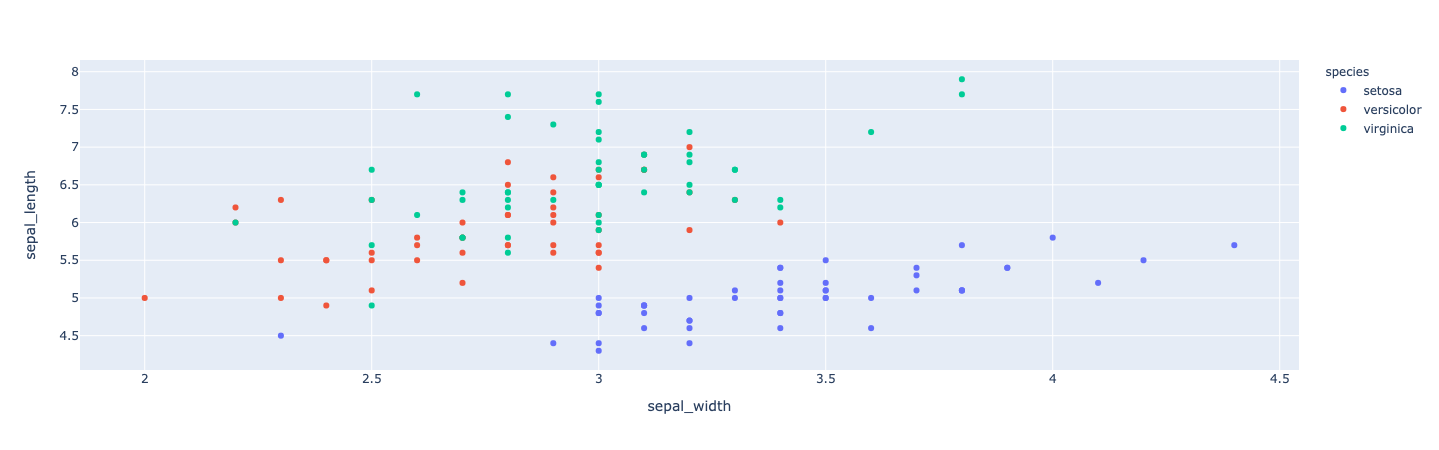

In [5]:
df_iris = px.data.iris()
fig = px.scatter(df_iris, x="sepal_width", y="sepal_length", color="species")
fig.show()

In [6]:
df_iris.head()

sepal_length  sepal_width  petal_length  petal_width species  species_id
0           5.1          3.5           1.4          0.2  setosa           1
1           4.9          3.0           1.4          0.2  setosa           1
2           4.7          3.2           1.3          0.2  setosa           1
3           4.6          3.1           1.5          0.2  setosa           1
4           5.0          3.6           1.4          0.2  setosa           1

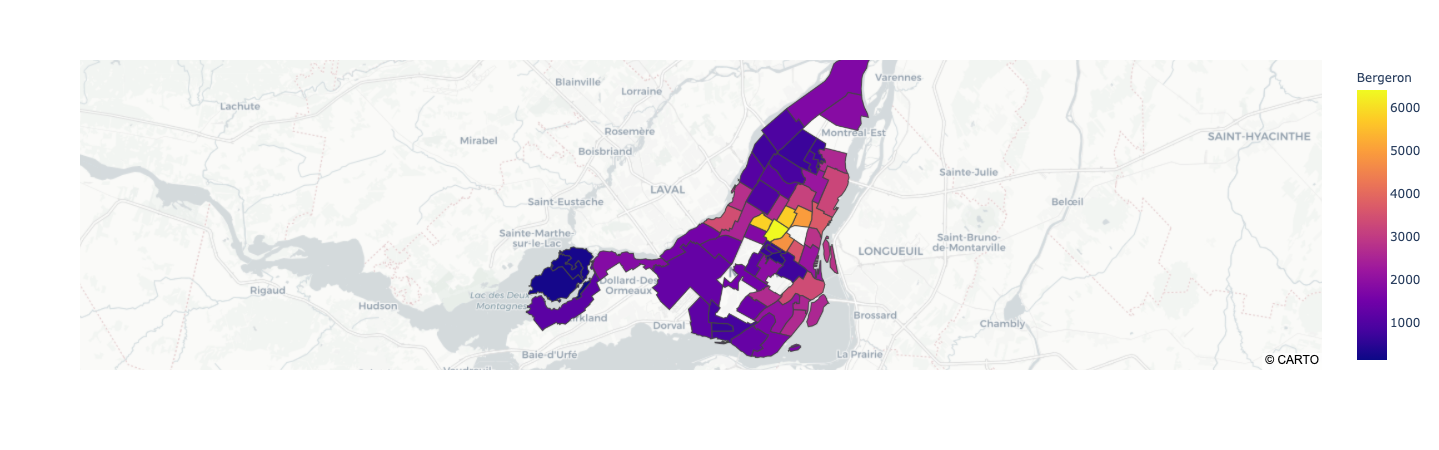

In [7]:
df_px2 = px.data.election()
geojson = px.data.election_geojson()

fig = px.choropleth_mapbox(df_px2, geojson=geojson, color="Bergeron",
                           locations="district", featureidkey="properties.district",
                           center={"lat": 45.5517, "lon": -73.7073},
                           mapbox_style="carto-positron", zoom=9)
fig.show()

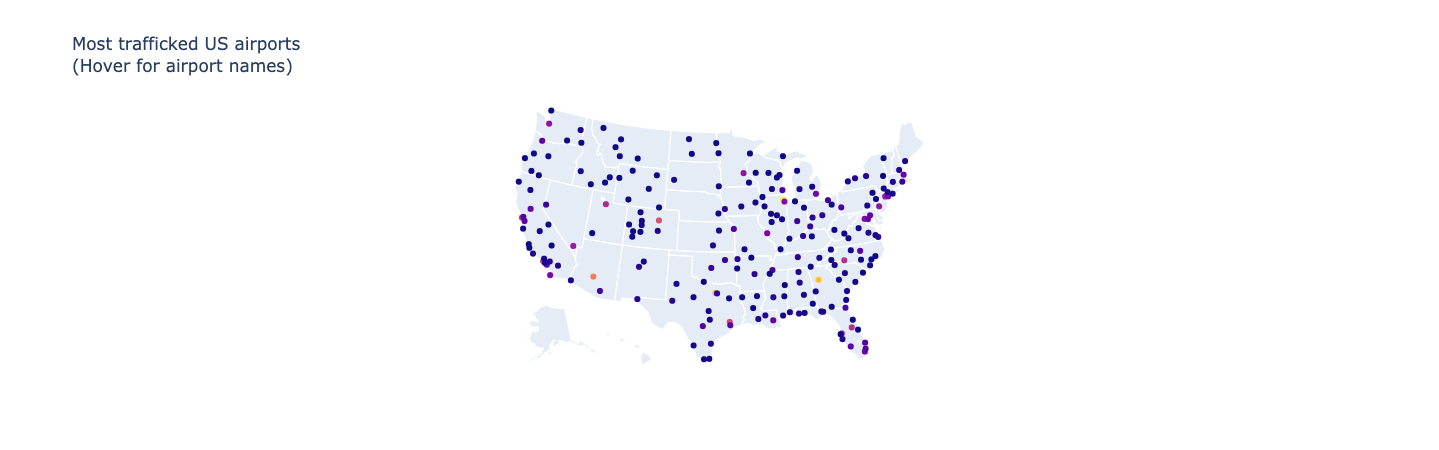

In [8]:
import plotly.graph_objects as go

df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_february_us_airport_traffic.csv')
df['text'] = df['airport'] + '' + df['city'] + ', ' + df['state'] + '' + 'Arrivals: ' + df['cnt'].astype(str)

fig = go.Figure(data=go.Scattergeo(
        lon = df['long'],
        lat = df['lat'],
        text = df['text'],
        mode = 'markers',
        marker_color = df['cnt'],
        ))

fig.update_layout(
        title = 'Most trafficked US airports<br>(Hover for airport names)',
        geo_scope='usa',
    )
fig.show()

---

In [27]:
import geopandas as gpd

In [28]:
import fiona

In [29]:
import shapely

In [30]:
import pyproj